### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**

## КП №4 

**Радченко Олег** _БС-81_

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
df = pd.DataFrame({
    'var1_normal': np.random.normal(loc=13.37, scale=1, size=20),
    'var2_normal': np.random.normal(loc=1, scale=13.37, size=20),
    'var3_normal': np.random.normal(loc=22, scale=8, size=20),
    'var4_gumbel': np.random.gumbel(loc=13.37, scale=1, size=20),
    'var5_logistic': np.random.logistic(loc=1, scale=13.37, size=20),
    'var6_laplace': np.random.laplace(loc=22, scale=8, size=20)
})

df

,var1_normal,var2_normal,var3_normal,var4_gumbel,var5_logistic,var6_laplace
0,12.266661,24.737365,21.564438,15.641293,49.882590,33.529453
1,14.425666,-10.760282,10.318978,12.549141,3.727743,-3.063968
2,14.386855,8.859465,27.068894,13.782434,1.530803,18.187483
3,14.533310,-0.247286,24.455019,14.317299,5.286415,41.788310
4,13.347229,-0.429979,19.718265,13.542400,-0.139528,22.223837
5,12.959867,25.655903,30.538518,15.217163,0.788238,31.800714
6,13.811070,0.856714,28.967485,13.955563,11.410339,34.362448
7,14.001717,-12.216362,20.947409,12.655527,-15.260361,-4.835832
8,12.449539,17.068288,24.757984,15.005134,11.684651,11.639262
9,12.069203,6.010730,15.347665,14.042506,14.695948,13.822763


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку:
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [3]:
# Sort Sample Values By Ascending

df = df.apply(lambda x: x.sort_values().values)
df

,var1_normal,var2_normal,var3_normal,var4_gumbel,var5_logistic,var6_laplace
0,11.902847,-17.838674,10.318978,12.161955,-22.997872,-4.835832
1,12.060181,-16.998019,10.547495,12.549141,-15.260361,-3.063968
2,12.069203,-12.490423,12.890107,12.655527,-7.765469,11.639262
3,12.078248,-12.216362,15.347665,13.212932,-5.091314,13.298512
4,12.266661,-10.760282,15.421215,13.278233,-4.851577,13.822763
5,12.449539,-6.381446,17.786806,13.542400,-0.292668,14.714655
6,12.959867,-0.429979,19.718265,13.593067,-0.139528,18.187483
7,13.035019,-0.247286,20.947409,13.782434,0.788238,21.189078
8,13.347229,0.856714,21.564438,13.912981,1.530803,22.177783
9,13.373643,2.611410,23.150390,13.955563,3.077189,22.223837


![title](W.jpg)

In [4]:
# (a'y)^2
# n = 20;

arrSize = df.shape[0]

# table values
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def calculateB(samples):
    return sum([a[i]*(samples[(arrSize-1)-i]-samples[i]) for i in range(arrSize//2)])

b= {key: calculateB(df[key]) for key in df}

In [5]:
#  S^2

def calculateSquaredS(samples, meanValue):
    return sum([ pow(samples[i]-meanValue, 2) for i in range(arrSize)]) 

meanValues = {key: np.mean(df[key]) for key in df}
squaredS = {key: calculateSquaredS(df[key], meanValues[key])
                 for key in df}

In [6]:
# W

def calculateW(b, squaredS):
    return pow(b,2)/squaredS

WCalculated = {key: calculateW(b[key], squaredS[key]) for key in df}

WTheoretical = sts.shapiro(df['var6_laplace'])
WTheoretical
#WCalculated

(0.9515164494514465, 0.3906972110271454)

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [7]:
titles = ["Variable", "Statistics", "Distribution"]
resultDf = pd.DataFrame(columns = titles)
resultDf

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [8]:
resultDf["Variable"] = df.keys()
resultDf

,Variable,Statistics,Distribution
0,var1_normal,NaN,NaN
1,var2_normal,NaN,NaN
2,var3_normal,NaN,NaN
3,var4_gumbel,NaN,NaN
4,var5_logistic,NaN,NaN
5,var6_laplace,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [9]:
# samples = 20 -> critical value = 0.905
# https://scistatcalc.blogspot.com/2013/09/critical-value-of-w-statistic.html?m=0#:~:text=The%20alpha%20level%20is%205,up%20to%2050%20are%20shown.

criticalValue = 0.905

resultDf["Distribution"] = [
                               ('normal ' if WCalculated[key] > 0.905  else 'non-normal ')
                               +
                               str(WCalculated[key])
                                   for key in resultDf["Variable"]
                           ]
resultDf

,Variable,Statistics,Distribution
0,var1_normal,NaN,non-normal 0.9041324534501165
1,var2_normal,NaN,normal 0.9564663594029867
2,var3_normal,NaN,normal 0.9446760586418453
3,var4_gumbel,NaN,normal 0.9826322680733601
4,var5_logistic,NaN,normal 0.90986342287845
5,var6_laplace,NaN,normal 0.9512047168283702


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [10]:
newArrSize = resultDf.shape[0]

for i in range (newArrSize):
    key = resultDf["Variable"][i]
    if 'normal' in key:
        resultDf["Statistics"][i] = f'{df[key].mean()} [{df[key].std()}]'

resultDf

,Variable,Statistics,Distribution
0,var1_normal,13.363582107209234 [0.9619122377603841],non-normal 0.9041324534501165
1,var2_normal,3.849921927467716 [13.68541281946677],normal 0.9564663594029867
2,var3_normal,21.814166465010917 [6.35193127979623],normal 0.9446760586418453
3,var4_gumbel,NaN,normal 0.9826322680733601
4,var5_logistic,NaN,normal 0.90986342287845
5,var6_laplace,NaN,normal 0.9512047168283702


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [11]:
for i in range (newArrSize):
    key = resultDf["Variable"][i]
    if 'normal' not in key:
        resultDf["Statistics"][i] = f'{df[key].median()} [{df[key].quantile(0.25)}; {df[key].quantile(0.75)}]'

resultDf

,Variable,Statistics,Distribution
0,var1_normal,13.363582107209234 [0.9619122377603841],non-normal 0.9041324534501165
1,var2_normal,3.849921927467716 [13.68541281946677],normal 0.9564663594029867
2,var3_normal,21.814166465010917 [6.35193127979623],normal 0.9446760586418453
3,var4_gumbel,13.997827622156464 [13.476358406920298; 14.889...,normal 0.9826322680733601
4,var5_logistic,3.4024663874434227 [-1.4323954910742338; 11.47...,normal 0.90986342287845
5,var6_laplace,22.611580933214658 [14.491681929788957; 28.317...,normal 0.9512047168283702


8. Зберегти таблицю в пдф форматі

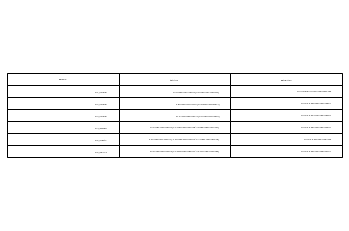

In [12]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

fig = plt.figure()

ax=fig.add_subplot(111)

cell_text = []
for row in range(len(resultDf)):
    cell_text.append(resultDf.iloc[row])

ax.table(cellText=cell_text, colLabels=resultDf.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()